In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv(r"../data/Combined_dataset.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,cd_account,securities,TransactionFrequency,Recency,AverageTransactionAmount
0,58,management,married,tertiary,no,2143,1,0,unknown,261,1,-1,0,unknown,no,0,0,2.0,25.0,807.50
1,44,technician,single,secondary,no,29,1,0,unknown,151,1,-1,0,unknown,no,0,0,1.0,48.0,60.00
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,76,1,-1,0,unknown,no,0,0,2.0,44.0,995.00
3,35,management,married,tertiary,no,231,1,0,unknown,139,1,-1,0,unknown,no,0,0,1.0,56.0,819.00
4,28,management,single,tertiary,no,447,1,1,unknown,217,1,-1,0,unknown,no,0,0,1.0,54.0,641.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,51,technician,married,tertiary,no,825,0,0,cellular,977,3,-1,0,unknown,yes,0,0,1.0,53.0,215.00
43350,71,retired,divorced,primary,no,1729,0,0,cellular,456,2,-1,0,unknown,yes,0,0,1.0,61.0,5999.00
43351,72,retired,married,secondary,no,5715,0,0,cellular,1127,5,184,3,success,yes,0,0,1.0,36.0,1156.34
43352,57,blue-collar,married,secondary,no,668,0,0,telephone,508,4,-1,0,unknown,no,0,0,1.0,37.0,488.00


In [3]:
# Specify categorical and numerical columns for easier data processing
categorical_cols = ['y', 'job', 'marital', 'education', 'default', 'contact', 'poutcome']
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'TransactionFrequency', 'Recency', 'AverageTransactionAmount', 'housing', 'loan', 'cd_account', 'securities']

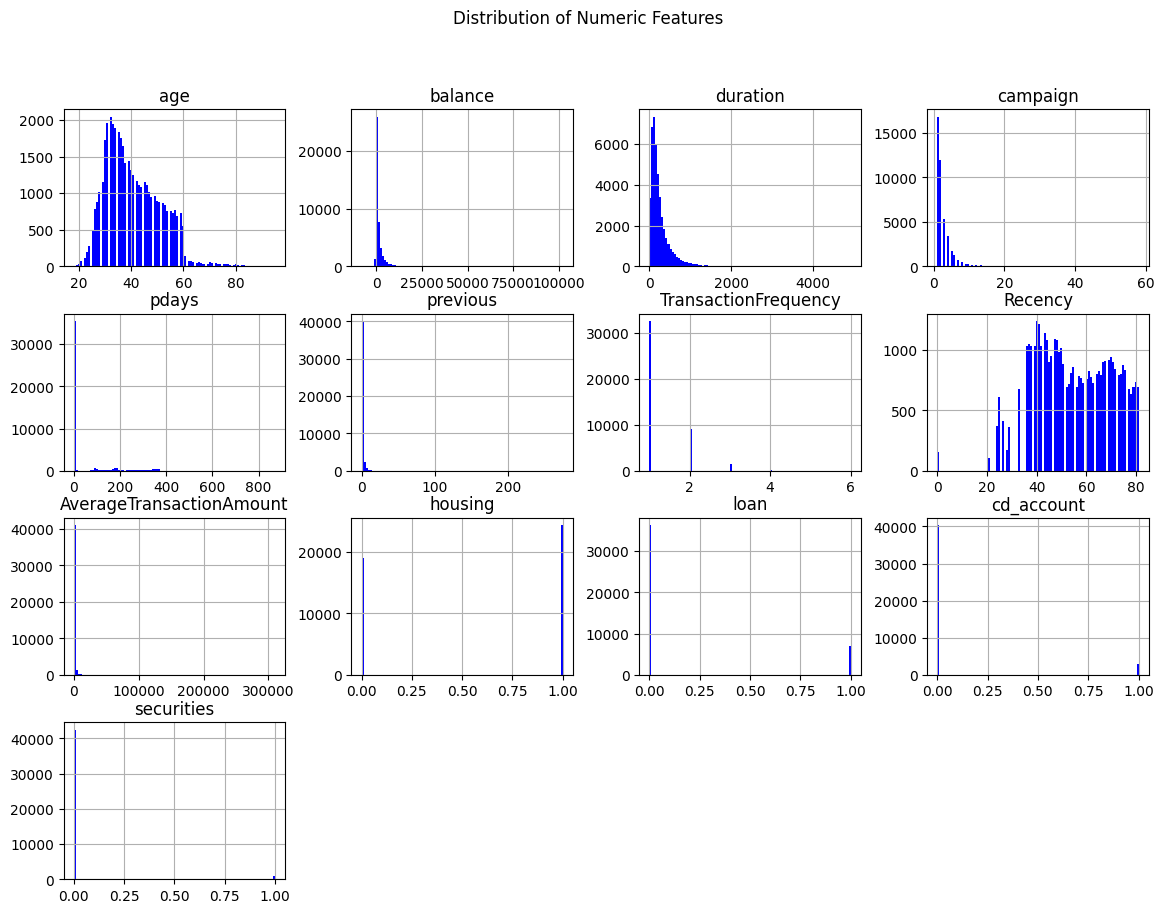

In [4]:
# Plot histograms to show the distribution of each numerical feature in the dataset.
df[numerical_cols].hist(bins=100, figsize=(14, 10), color='blue')
plt.suptitle('Distribution of Numeric Features')
plt.show()

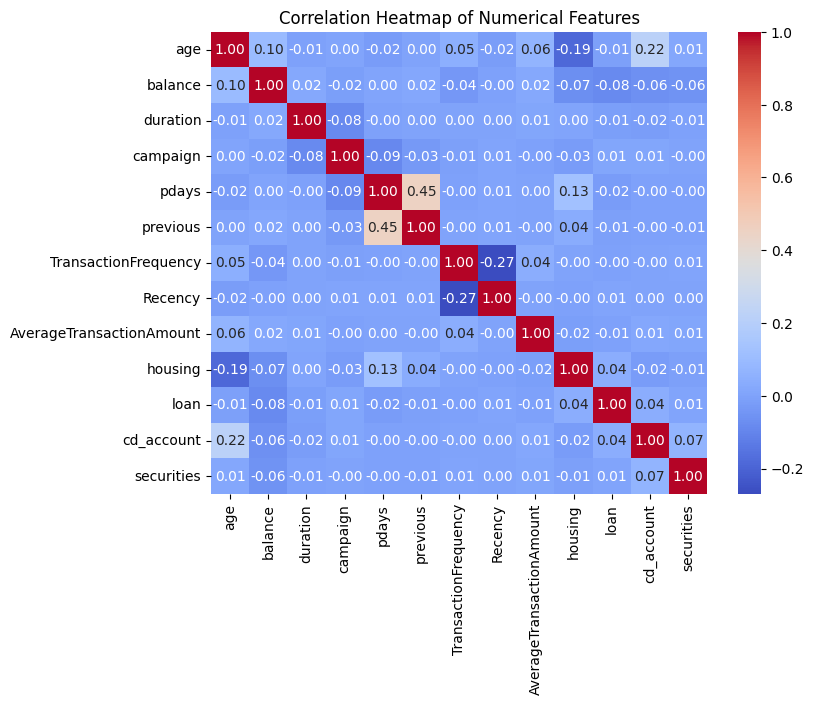

In [5]:
# Create a preprocessor to standardize numerical columns and one-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),    # Apply standard scaling to numerical columns
        ('cat', OneHotEncoder(), categorical_cols)    # Apply one-hot encoding to categorical columns
    ])

# Apply the preprocessor to transform the data and calculate correlations among numerical features
processed_data = preprocessor.fit_transform(df)

# Compute and plot a heatmap of correlations for numerical features to assess relationships
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [6]:
# Create a new DataFrame segment by dropping irrelavent columns
seg1 = df.drop(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'])
seg1

,housing,loan,cd_account,securities,TransactionFrequency,Recency,AverageTransactionAmount
0,1,0,0,0,2.0,25.0,807.50
1,1,0,0,0,1.0,48.0,60.00
2,1,1,0,0,2.0,44.0,995.00
3,1,0,0,0,1.0,56.0,819.00
4,1,1,0,0,1.0,54.0,641.00
...,...,...,...,...,...,...,...
43349,0,0,0,0,1.0,53.0,215.00
43350,0,0,0,0,1.0,61.0,5999.00
43351,0,0,0,0,1.0,36.0,1156.34
43352,0,0,0,0,1.0,37.0,488.00


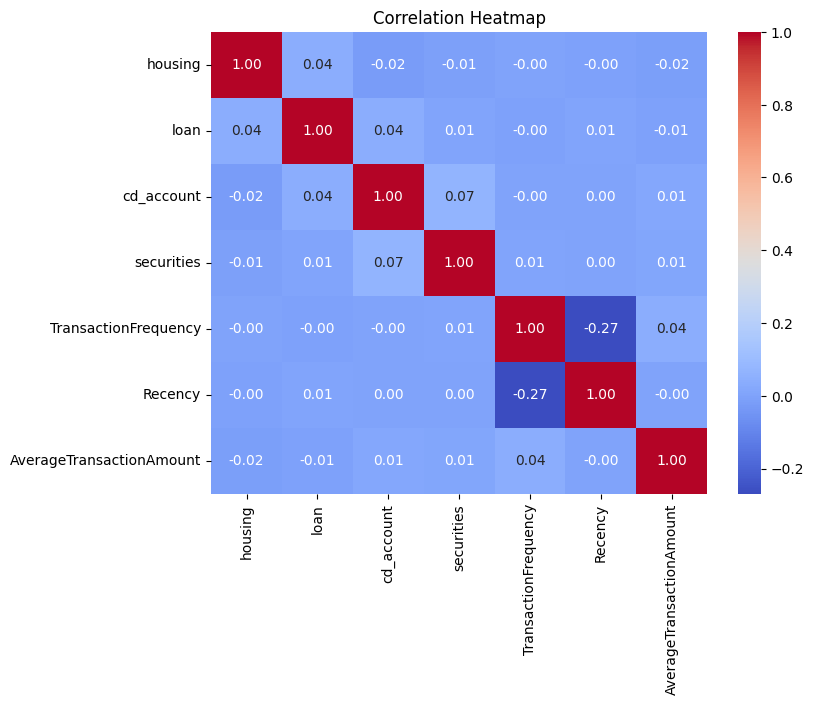

In [9]:
# Compute and plot the correlation heatmap for the original seg1 data (before transformation)
corr_matrix = seg1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

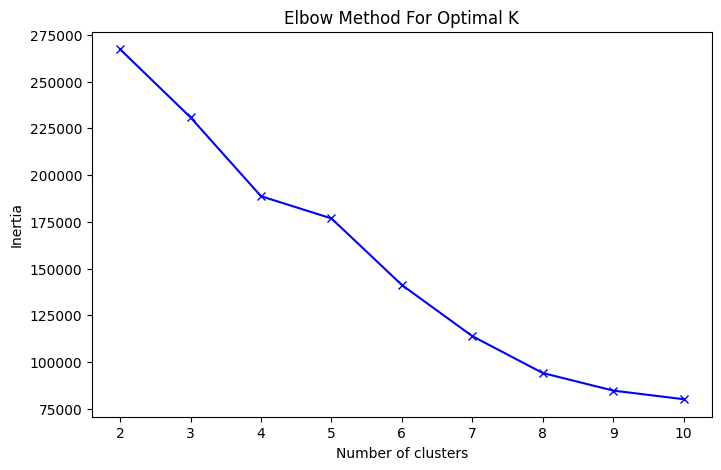

In [10]:
# Define a preprocessor for seg1 with scaling
seg1preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['TransactionFrequency', 'Recency', 'AverageTransactionAmount', 'housing', 'loan', 'cd_account', 'securities']),  # Scale specified numerical features
        ('cat', OneHotEncoder(), [])
    ])

# Apply the preprocessor to transform the seg1 data
processed_seg1_data = seg1preprocessor.fit_transform(seg1)

# Initialize an empty list to store the inertia values for different k values
inertia = []

# Define the range of k values (number of clusters) to test
K = range(2, 11)

# Loop through each k value to calculate the inertia
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') 
    kmeans.fit(processed_seg1_data) 
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

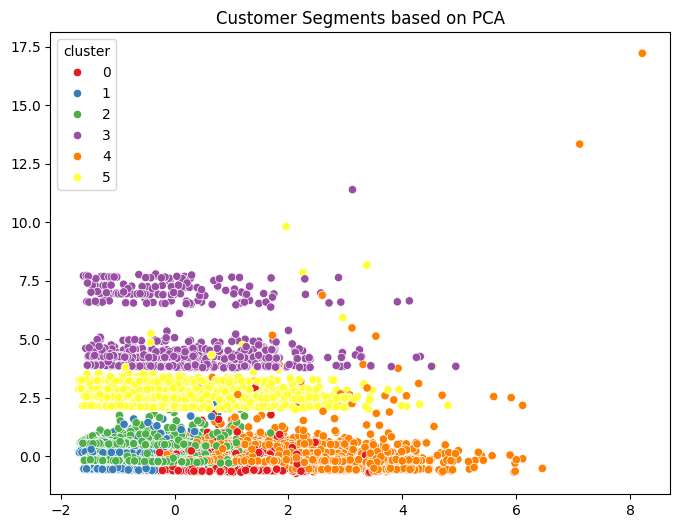

cluster
2    12950
0    10760
1    10679
4     5243
5     2884
3      838
Name: count, dtype: int64

In [11]:
# Optimal number of clusters we choose
optimal_clusters = 6

# Initialize the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')

# Apply KMeans to the processed data and assign the predicted clusters to each data point
clusters = kmeans.fit_predict(processed_seg1_data)

# Add the cluster labels as a new column in the original DataFrame
seg1['cluster'] = clusters

# Initialize PCA to reduce the data to 2 principal components for visualization
pca = PCA(n_components=2)

# Apply PCA to the processed seg1 data and reduce it to 2 dimensions
X_pca = pca.fit_transform(processed_seg1_data)

# Create a scatter plot to visualize the customer segments
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=seg1['cluster'], palette='Set1')
plt.title('Customer Segments based on PCA')
plt.show()

# Get the count of data points in each cluster
seg1['cluster'].value_counts()

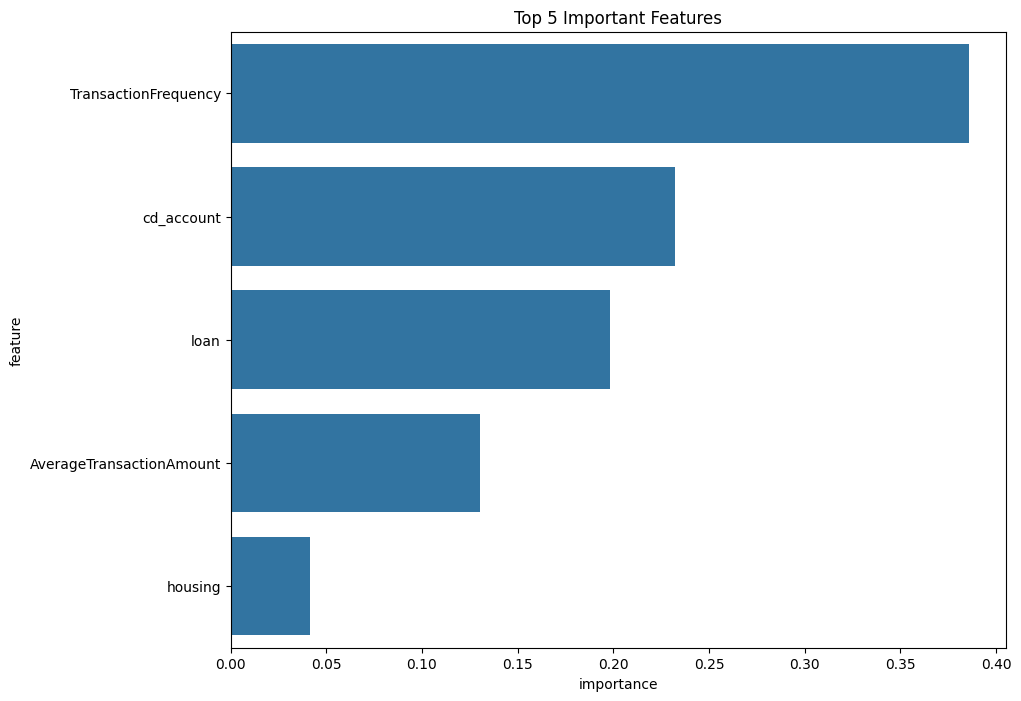

In [12]:
# Trains a Random Forest model to predict customer segments (clusters)
# and visualizes the importance of each feature in determining the cluster assignments.
rf_df = seg1.copy()

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(rf_df.drop(columns='cluster'), rf_df['cluster'])

# Get the feature importances from the trained model
importances = rf.feature_importances_

encoded_feature_names = np.hstack([
    ['TransactionFrequency', 'Recency', 'AverageTransactionAmount', 'housing', 'loan', 'cd_account', 'securities'],
])

feature_importance_df = pd.DataFrame({
    'feature': encoded_feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 5 most important features using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(5))
plt.title('Top 5 Important Features')
plt.show()

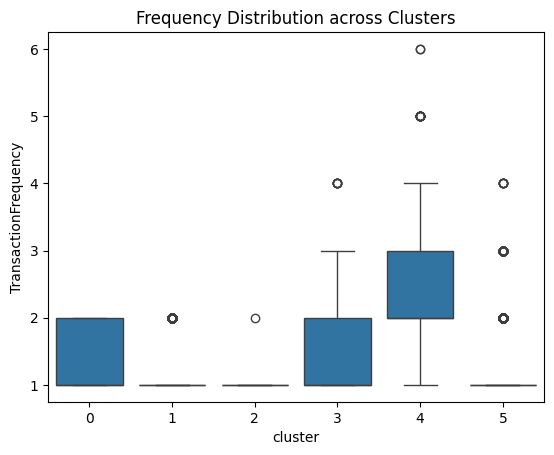

In [14]:
# Visualize the distribution of 'Transaction Frequency' across different clusters
sns.boxplot(x='cluster', y='TransactionFrequency', data=seg1)
plt.title('Frequency Distribution across Clusters')
plt.show()

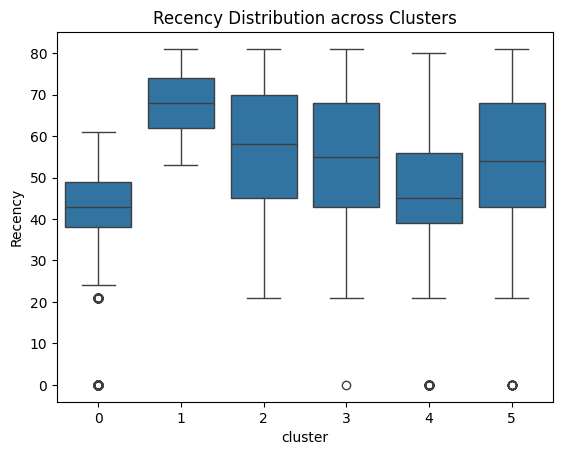

In [15]:
# Visualize the distribution of 'Recency' across different clusters
sns.boxplot(x='cluster', y='Recency', data=seg1)
plt.title('Recency Distribution across Clusters')
plt.show()

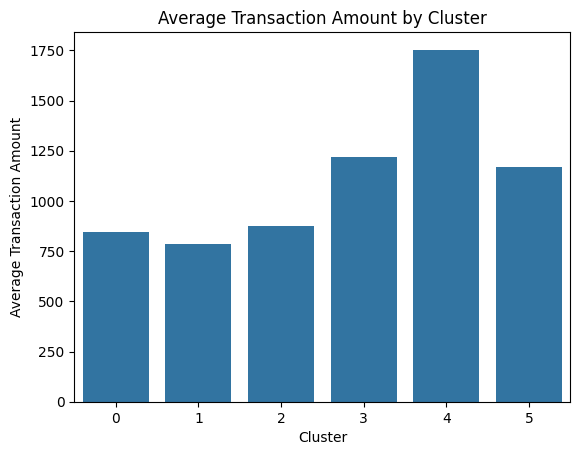

In [ ]:
# Visualize the average 'Average Transaction Amount' for each cluster
sns.barplot(data=df, x='cluster', y='AverageTransactionAmount', errorbar=None)
plt.title('Average Transaction Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Transaction Amount')
plt.show()

In [16]:
# Save the 'cluster' column got from seg1
df['cluster'] = seg1['cluster']

print('TransactionFrequency', seg1.groupby('cluster')['TransactionFrequency'].mean())
print('AverageTransactionAmount', seg1.groupby('cluster')['AverageTransactionAmount'].mean())
print('Recency', seg1.groupby('cluster')['Recency'].mean())
print('balance', df.groupby('cluster')['balance'].mean())

TransactionFrequency cluster
0    1.344796
1    1.082873
2    1.000077
3    1.313842
4    2.335686
5    1.282594
Name: TransactionFrequency, dtype: float64
AverageTransactionAmount cluster
0     843.472221
1     784.440441
2     876.706464
3    1217.384552
4    1753.414855
5    1169.405583
Name: AverageTransactionAmount, dtype: float64
Recency cluster
0    42.498792
1    68.045135
2    57.414981
3    55.177804
4    47.072668
5    54.828363
Name: Recency, dtype: float64
balance cluster
0    1272.011617
1    1224.541905
2    1777.511583
3     157.033413
4    1306.303834
5     690.516990
Name: balance, dtype: float64


In [17]:
print('loan', seg1.groupby('cluster')['loan'].mean())
print('cd_account', seg1.groupby('cluster')['cd_account'].mean())
print('housing', seg1.groupby('cluster')['housing'].mean())
print('securities', seg1.groupby('cluster')['securities'].mean())

loan cluster
0    0.165985
1    0.181665
2    0.140695
3    0.181384
4    0.156018
5    0.205617
Name: loan, dtype: float64
cd_account cluster
0    0.000000
1    0.000000
2    0.000000
3    0.190931
4    0.001144
5    1.000000
Name: cd_account, dtype: float64
housing cluster
0    0.997770
1    1.000000
2    0.000000
3    0.528640
4    0.180813
5    0.521498
Name: housing, dtype: float64
securities cluster
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
Name: securities, dtype: float64


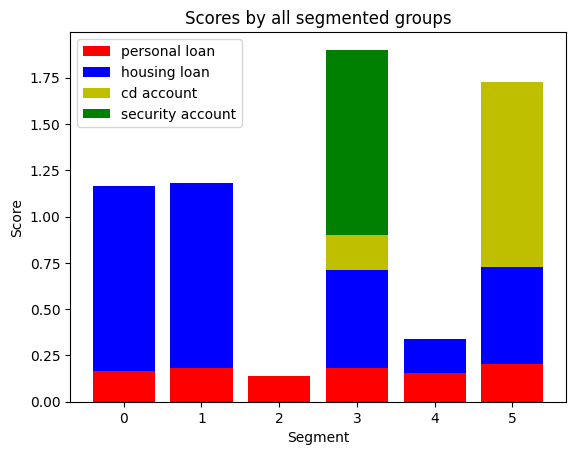

In [18]:
# Visualise the features of each segmented groups
x = ['0', '1', '2', '3', '4', '5']
y1 = seg1.groupby('cluster')['loan'].mean()
y2 = seg1.groupby('cluster')['housing'].mean()
y3 = seg1.groupby('cluster')['cd_account'].mean()
y4 = seg1.groupby('cluster')['securities'].mean()
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Segment")
plt.ylabel("Score")
plt.legend(['personal loan', 'housing loan', 'cd account', 'security account'])
plt.title("Scores by all segmented groups")
plt.show()

In [19]:
# Prepare for prediction
categorical_cols.remove('y')
numerical_cols.append('cluster')

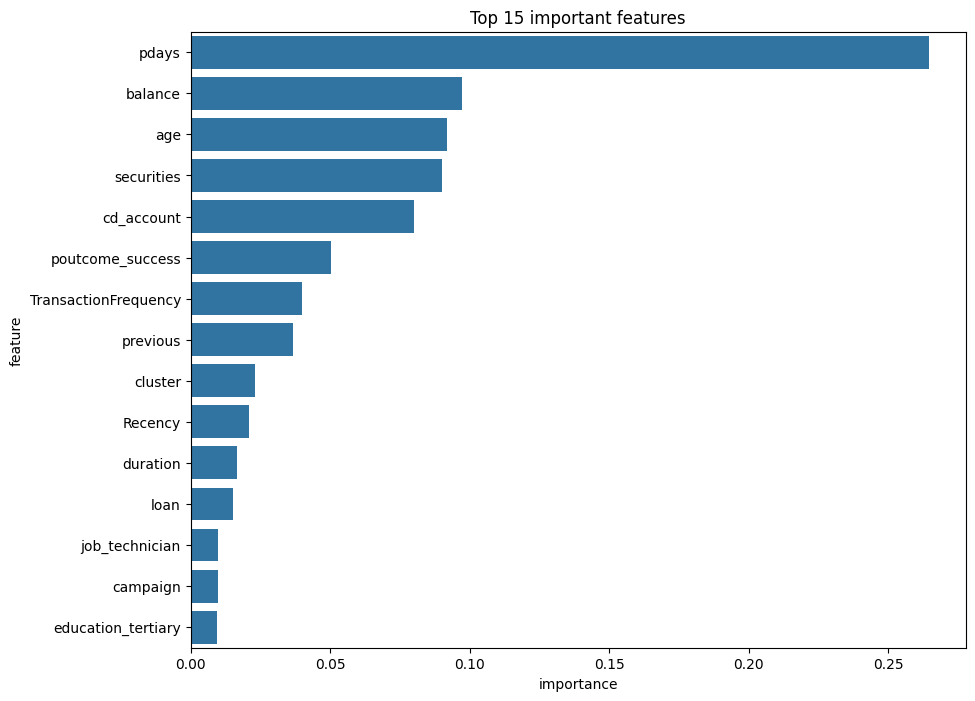

In [20]:
# Define a preprocessor to standardize numerical columns and one-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Apply the transformations to df
X = preprocessor.fit_transform(df)

# Random Forest for df
rf_df = df.copy()
rf_df = pd.get_dummies(rf_df, columns=categorical_cols)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(rf_df.drop(columns='y'), rf_df['y'])

importances = rf.feature_importances_

encoded_feature_names = np.hstack([
    numerical_cols,
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
])

feature_importance_df = pd.DataFrame({
    'feature': encoded_feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 important features')
plt.show()

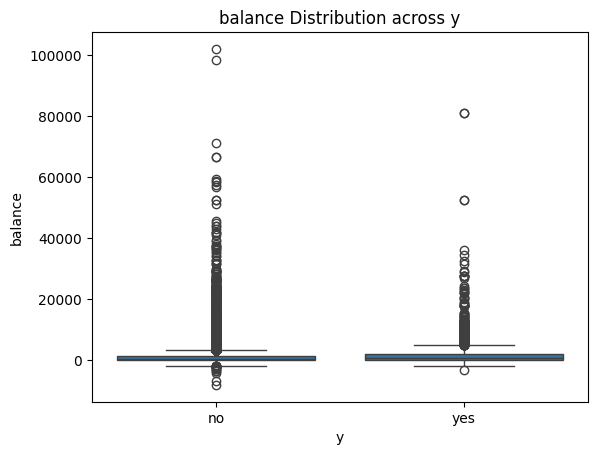

balance y
no     1299.010805
yes    1782.867183
Name: balance, dtype: float64


In [21]:
# Visualize the distribution of 'balance' across different values of 'y'
sns.boxplot(x='y', y='balance', data=df)
plt.title('balance Distribution across y')
plt.show()
print('balance', df.groupby('y')['balance'].mean())

In [22]:
print('securities', df.groupby('y')['securities'].mean())

securities y
no     0.020226
yes    0.012507
Name: securities, dtype: float64


In [23]:
print('y', df.groupby('cluster')['pdays'].mean())

y cluster
0    51.215149
1    51.623654
2    26.538996
3    36.768496
4    30.122258
5    39.582178
Name: pdays, dtype: float64


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

rf_df = df.copy()
rf_df = pd.get_dummies(rf_df, columns=categorical_cols)

X_train, X_test, y_train, y_test = train_test_split(
    rf_df.drop(columns='y'), rf_df['y'], test_size=0.3, random_state=42
)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
